In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [66]:
# Loading the data provided

data = pd.read_csv("data/einkommen.train",delimiter=",",header=None)
data.columns = ["Age","Employment_Type","Weighing_Factor","Education_Level","Schooling","Marital_Status","Employment_Area","Partnership","Ethnicity","Gender","Gains_FA","Loss_FA","Working_Time","Country_of_Birth","Income"]
data.head()

,Age,Employment_Type,Weighing_Factor,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gains_FA,Loss_FA,Working_Time,Country_of_Birth,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               30000 non-null  int64 
 1   Employment_Type   30000 non-null  object
 2   Weighing_Factor   30000 non-null  int64 
 3   Education_Level   30000 non-null  object
 4   Schooling         30000 non-null  int64 
 5   Marital_Status    30000 non-null  object
 6   Employment_Area   30000 non-null  object
 7   Partnership       30000 non-null  object
 8   Ethnicity         30000 non-null  object
 9   Gender            30000 non-null  object
 10  Gains_FA          30000 non-null  int64 
 11  Loss_FA           30000 non-null  int64 
 12  Working_Time      30000 non-null  int64 
 13  Country_of_Birth  30000 non-null  object
 14  Income            30000 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


In [68]:
data.describe().round(2)

,Age,Weighing_Factor,Schooling,Gains_FA,Loss_FA,Working_Time
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,38.58,189767.51,10.08,1091.69,86.62,40.43
std,13.65,105442.01,2.57,7467.39,401.53,12.31
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117833.00,9.00,0.00,0.00,40.00
50%,37.00,178478.00,10.00,0.00,0.00,40.00
75%,48.00,236938.50,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [69]:
# Replacing all "?" data with np.nan 

data = data.replace({" ?":np.nan})

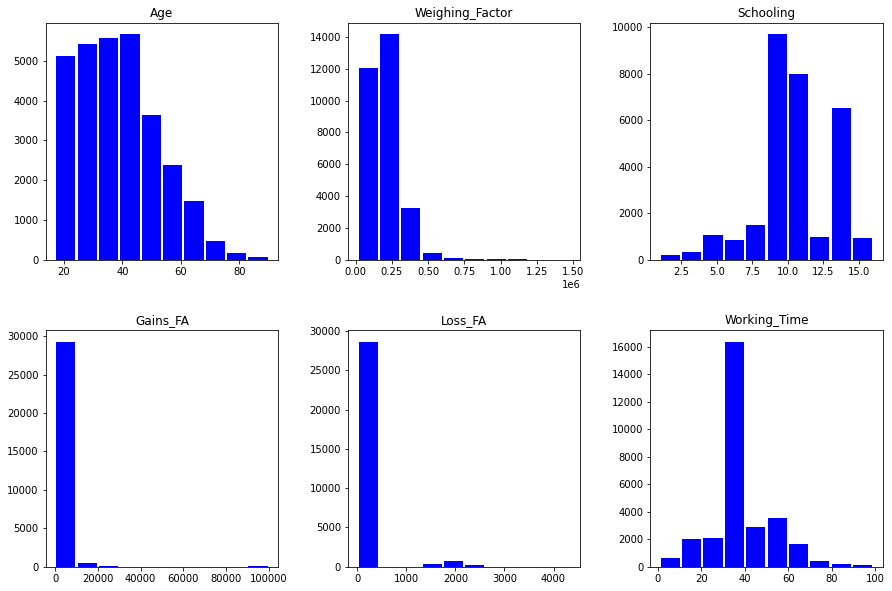

In [70]:
# Visualzing all the numerical data to see what kind of scaling should be used

data.hist(figsize=(15,10),color="b",rwidth=0.9,grid=False,layout=(2,3));

In [71]:
# Selecting features that have exponential data distributions to be log+1 scaled

log_features = ["Age","Weighing_Factor","Gains_FA","Loss_FA"]

# Selecting features that have a somewhat gaussian distribution to be normlised

gaussian_features = ["Schooling","Working_Time"]

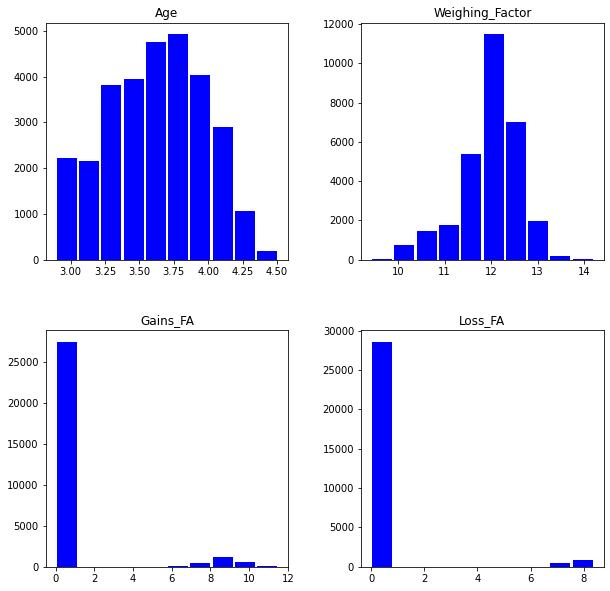

In [72]:
# Scaling the log_features and displaying their distribution

log_features_vals = np.log1p(data[log_features])
log_feature_df = pd.DataFrame(log_features_vals,columns=log_features)
log_feature_df.hist(figsize=(10,10),color="b",rwidth=0.9,grid=False);

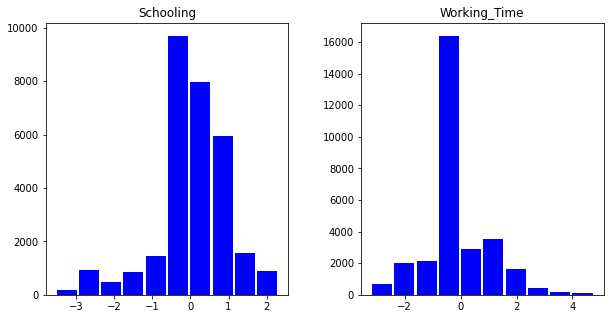

In [73]:
# Scaling the gaussian_features and displaying their distribution

ss = StandardScaler()
gaussian_feature_df = pd.DataFrame(ss.fit_transform(data[gaussian_features]),columns=gaussian_features)
gaussian_feature_df.hist(figsize=(10,5),color="b",rwidth=0.9,grid=False);

In [74]:
data[log_features] = log_feature_df[log_features]
data[gaussian_features] = gaussian_feature_df[gaussian_features]

In [91]:
# Splitting data with target attributes and no target attributes

data_w_income = data[data.Income.notna()]
data_no_income = data[data.Income.isna()]
print("Data with Income: ",len(data_w_income))
print("Data without Income: ",len(data_no_income))

Data with Income:  5000
Data without Income:  25000


In [92]:
data_w_income.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

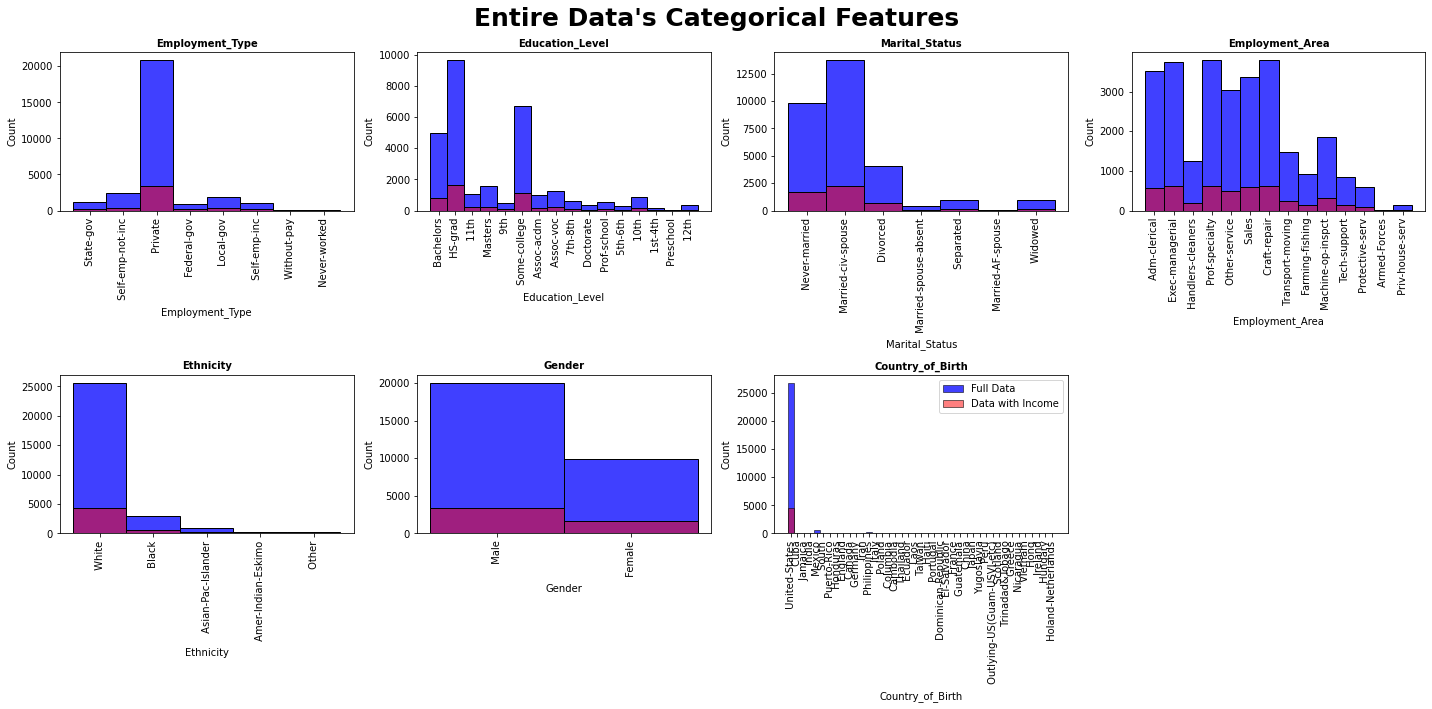

In [93]:
fig,axes = plt.subplots(2,4,figsize=(20,10))

sns.histplot(data[data.columns.values[1]],ax=axes[0,0],color="b",label="Full Data");
sns.histplot(data_w_income[data_w_income.columns.values[1]],ax=axes[0,0],color="r",alpha=0.5,label="Data with Income");
axes[0,0].tick_params(axis='x', labelrotation=90)
axes[0,0].set_title(data.columns.values[1],fontsize=10,fontweight="bold");

sns.histplot(data[data.columns.values[3]],ax=axes[0,1],color="b",label="Full Data");
sns.histplot(data_w_income[data_w_income.columns.values[3]],ax=axes[0,1],color="r",alpha=0.5,label="Data with Income");
axes[0,1].tick_params(axis='x', labelrotation=90)
axes[0,1].set_title(data.columns.values[3],fontsize=10,fontweight="bold");

sns.histplot(data[data.columns.values[5]],ax=axes[0,2],color="b",label="Full Data");
sns.histplot(data_w_income[data_w_income.columns.values[5]],ax=axes[0,2],color="r",alpha=0.5,label="Data with Income");
axes[0,2].tick_params(axis='x', labelrotation=90)
axes[0,2].set_title(data.columns.values[5],fontsize=10,fontweight="bold");

sns.histplot(data[data.columns.values[6]],ax=axes[0,3],color="b",label="Full Data");
sns.histplot(data_w_income[data_w_income.columns.values[6]],ax=axes[0,3],color="r",alpha=0.5,label="Data with Income");
axes[0,3].tick_params(axis='x', labelrotation=90)
axes[0,3].set_title(data.columns.values[6],fontsize=10,fontweight="bold");

sns.histplot(data[data.columns.values[8]],ax=axes[1,0],color="b",label="Full Data");
sns.histplot(data_w_income[data_w_income.columns.values[8]],ax=axes[1,0],color="r",alpha=0.5,label="Data with Income");
axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,0].set_title(data.columns.values[8],fontsize=10,fontweight="bold");

sns.histplot(data[data.columns.values[9]],ax=axes[1,1],color="b",label="Full Data");
sns.histplot(data_w_income[data_w_income.columns.values[9]],ax=axes[1,1],color="r",alpha=0.5,label="Data with Income");
axes[1,1].tick_params(axis='x', labelrotation=90)
axes[1,1].set_title(data.columns.values[9],fontsize=10,fontweight="bold");

sns.histplot(data[data.columns.values[13]],ax=axes[1,2],color="b",label="Full Data");
sns.histplot(data_w_income[data_w_income.columns.values[13]],ax=axes[1,2],color="r",alpha=0.5,label="Data with Income");
axes[1,2].tick_params(axis='x', labelrotation=90)
axes[1,2].set_title(data.columns.values[13],fontsize=10,fontweight="bold");

fig.delaxes(axes[1,3]);

fig.suptitle("Entire Data's Categorical Features",fontsize=25,fontweight="bold")
plt.legend(loc="best")

plt.tight_layout()

In [94]:
df = data_w_income.copy()

In [95]:
df.head(10)

,Age,Employment_Type,Weighing_Factor,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gains_FA,Loss_FA,Working_Time,Country_of_Birth,Income
0,3.688879,State-gov,11.258253,Bachelors,1.135322,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,-0.035080,United-States,<=50K
1,3.931826,Self-emp-not-inc,11.330348,Bachelors,1.135322,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,-2.227904,United-States,<=50K
2,3.663562,Private,12.281398,HS-grad,-0.419772,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,-0.035080,United-States,<=50K
3,3.988984,Private,12.366157,11th,-1.197318,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,-0.035080,United-States,<=50K
4,3.367296,Private,12.732013,Bachelors,1.135322,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,-0.035080,Cuba,<=50K
5,3.637586,Private,12.558780,Masters,1.524095,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,-0.035080,United-States,<=50K
6,3.912023,Private,11.984103,9th,-1.974865,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,-1.984257,Jamaica,<=50K
7,3.970292,Self-emp-not-inc,12.253161,HS-grad,-0.419772,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.370999,United-States,>50K
8,3.465736,Private,10.731646,Masters,1.524095,Never-married,Prof-specialty,Not-in-family,White,Female,9.552866,0.0,0.777077,United-States,>50K
9,3.761200,Private,11.979486,Bachelors,1.135322,Married-civ-spouse,Exec-managerial,Husband,White,Male,8.552367,0.0,-0.035080,United-States,>50K


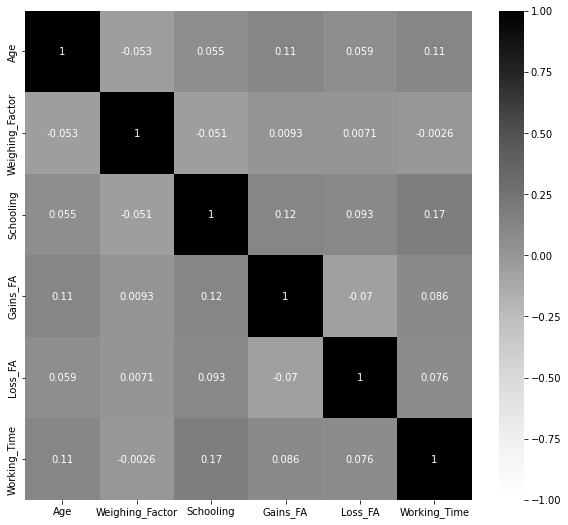

In [96]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0,cmap="Greys")
plt.show()

In [97]:
for i in df.Country_of_Birth.unique().tolist():
    print(f"{i} : {np.round((len(df[df.Country_of_Birth == i])/len(df))*100,2)}%")

 United-States : 89.3%
 Cuba : 0.28%
 Jamaica : 0.3%
 India : 0.24%
nan : 0.0%
 Mexico : 2.08%
 South : 0.18%
 Puerto-Rico : 0.32%
 Honduras : 0.06%
 England : 0.32%
 Canada : 0.56%
 Germany : 0.44%
 Iran : 0.22%
 Philippines : 0.44%
 Italy : 0.24%
 Poland : 0.18%
 Columbia : 0.1%
 Cambodia : 0.08%
 Thailand : 0.04%
 Ecuador : 0.08%
 Laos : 0.04%
 Taiwan : 0.2%
 Haiti : 0.12%
 Portugal : 0.14%
 Dominican-Republic : 0.26%
 El-Salvador : 0.32%
 France : 0.06%
 Guatemala : 0.2%
 China : 0.3%
 Japan : 0.18%
 Yugoslavia : 0.04%
 Peru : 0.06%
 Outlying-US(Guam-USVI-etc) : 0.06%
 Scotland : 0.02%
 Trinadad&Tobago : 0.08%
 Greece : 0.12%
 Nicaragua : 0.1%
 Vietnam : 0.2%
 Hong : 0.02%
 Ireland : 0.08%


In [98]:
# Dropping Country of Birth feature from the dataset

df.drop(columns=["Country_of_Birth"],inplace=True)
data_no_income.drop(columns=["Income","Country_of_Birth"],inplace=True)

c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [99]:
# Encoding the categorical data and saving their individual label encoder classes to encode the data without income.

label_encoding = {}
for index, str_column in enumerate([column for column in df.columns.tolist() if df[column].dtypes == "O"]):
    globals()[f"LE_{index}"] = LabelEncoder()
    df[str_column] = globals()[f"LE_{index}"].fit_transform(df[str_column].tolist())
    label_encoding[str_column] = globals()[f"LE_{index}"] 

In [100]:
label_encoding

{'Employment_Type': LabelEncoder(),
 'Education_Level': LabelEncoder(),
 'Marital_Status': LabelEncoder(),
 'Employment_Area': LabelEncoder(),
 'Partnership': LabelEncoder(),
 'Ethnicity': LabelEncoder(),
 'Gender': LabelEncoder(),
 'Income': LabelEncoder()}

In [101]:
for index, str_column in enumerate([column for column in data_no_income.columns.tolist() if data_no_income[column].dtypes == "O"]):
    data_no_income[str_column] = label_encoding[str_column].fit_transform(data_no_income[str_column].tolist())

C:\Users\kshit\AppData\Local\Temp\ipykernel_15592\206065029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_income[str_column] = label_encoding[str_column].fit_transform(data_no_income[str_column].tolist())


In [104]:
df.head()

,Age,Employment_Type,Weighing_Factor,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gains_FA,Loss_FA,Working_Time,Income
0,3.688879,5,11.258253,9,1.135322,4,0,1,4,1,7.684784,0.0,-0.035080,0
1,3.931826,4,11.330348,9,1.135322,2,3,0,4,1,0.000000,0.0,-2.227904,0
2,3.663562,2,12.281398,11,-0.419772,0,5,1,4,1,0.000000,0.0,-0.035080,0
3,3.988984,2,12.366157,1,-1.197318,2,5,0,2,1,0.000000,0.0,-0.035080,0
4,3.367296,2,12.732013,9,1.135322,2,9,5,2,0,0.000000,0.0,-0.035080,0


In [103]:
data_no_income.head()

,Age,Employment_Type,Weighing_Factor,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gains_FA,Loss_FA,Working_Time
5000,3.871201,4,11.285121,14,1.912869,0,9,1,4,1,10.233834,0.000000,0.777077
5001,4.025352,3,11.928176,9,1.135322,4,12,2,4,0,0.000000,7.372118,-0.197511
5002,3.295837,3,11.795560,11,-0.419772,2,3,5,4,0,8.519989,0.000000,-0.035080
5003,3.367296,3,11.993343,11,-0.419772,4,6,4,4,0,0.000000,0.000000,-0.035080
5004,3.610918,3,11.040471,11,-0.419772,2,2,0,2,1,0.000000,0.000000,-0.035080


In [64]:
# Saving the data to be used for training models and for prediction on the data not having the target feature income.

data.to_csv("./data/data.csv")
df.to_csv("./data/final_df_training.csv")
data_no_income.to_csv("./data/final_df_prediction.csv")